What I need

- 'Stock Price', 
- 'Strike Price', 
- 'Time to Expiration', 
- 'Volatility', 
- 'Days Since Start'

In [3]:
import pandas as pd

sheet_names = pd.ExcelFile("2018-01-02.xlsx").sheet_names
sheet_names

['14_days', '30_days', '90_days', '180_days', '365_days']

In [4]:
import pandas as pd
import numpy as np
import pandas_market_calendars as mcal  # Optional but useful for trading calendars

# Create a US trading calendar
nyse = mcal.get_calendar('NYSE')

# Define the range of dates needed (adjust as necessary)
calendar_schedule = nyse.schedule(start_date='2018-01-01', end_date='2020-12-31')
trading_days = calendar_schedule.index

# Initialize data storage
data_option = {
    "strike_price": [],
    "implied_volatility": [],
    "date": [],
    "exercise_date": [],
    "TTM": []
}

# Process each sheet
for sheet in sheet_names:
    data = pd.read_excel("2018-01-02.xlsx", sheet_name=sheet)

    for i, row in data.iterrows():
        trade_date = pd.to_datetime(row["date"])
        ex_date = pd.to_datetime(row["exdate"])

        # Calculate TTM in trading days
        ttm_days = np.sum((trading_days >= trade_date) & (trading_days <= ex_date))
        ttm = ttm_days / 252  # Adjust denominator if needed based on year

        # Append data
        data_option["strike_price"].append(row["strike_price"])
        data_option["implied_volatility"].append(row["impl_volatility"])
        data_option["date"].append(trade_date)
        data_option["exercise_date"].append(ex_date)
        data_option["TTM"].append(ttm)

# Convert to DataFrame and adjust strike price
data_option = pd.DataFrame(data_option)
data_option["strike_price"] = data_option["strike_price"] / 1000

data_option

,strike_price,implied_volatility,date,exercise_date,TTM
0,2455.0,0.162587,2018-01-02,2018-01-19,0.051587
1,2460.0,0.158693,2018-01-02,2018-01-19,0.051587
2,2465.0,0.154801,2018-01-02,2018-01-19,0.051587
3,2470.0,0.166021,2018-01-02,2018-01-19,0.051587
4,2475.0,0.162230,2018-01-02,2018-01-19,0.051587
...,...,...,...,...,...
413,3100.0,0.091209,2018-01-02,2018-12-31,0.996032
414,3200.0,0.092508,2018-01-02,2018-12-31,0.996032
415,3300.0,0.096934,2018-01-02,2018-12-21,0.976190
416,3400.0,0.104060,2018-01-02,2018-12-21,0.976190


# Collect Option Data

In [ ]:
# import os
# import zipfile

# # Define the folder containing zip files
# data_folder = r"C:\Users\HANS\vscode\projects\study\capstone\capstone_code\data"

# # Loop through all files in the folder
# for file_name in os.listdir(data_folder):
#     if file_name.lower().endswith('.zip'):
#         zip_path = os.path.join(data_folder, file_name)
#         zip_base_name = os.path.splitext(file_name)[0]  # e.g., "Jan 2020"

#         with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#             print(f"Extracting {file_name}...")

#             # Extract all files temporarily into the current folder
#             zip_ref.extractall(data_folder)

#             # Find the CSV file(s) that were extracted
#             for extracted_file in zip_ref.namelist():
#                 if extracted_file.lower().endswith('.csv'):
#                     old_csv_path = os.path.join(data_folder, extracted_file)
#                     new_csv_name = zip_base_name + '.csv'
#                     new_csv_path = os.path.join(data_folder, new_csv_name)

#                     # Rename the file
#                     os.rename(old_csv_path, new_csv_path)
#                     print(f"Renamed '{extracted_file}' to '{new_csv_name}'")

# print("All zip files have been extracted and renamed.")

Extracting Apr 2018.zip...
Renamed 'wjolthdmahs202jp.csv' to 'Apr 2018.csv'
Extracting Apr 2019.zip...
Renamed 'uebay77rn4gjyx8a.csv' to 'Apr 2019.csv'
Extracting Apr 2020.zip...
Renamed 'ceeplcjqmtgi9dhr.csv' to 'Apr 2020.csv'
Extracting Aug 2018.zip...
Renamed 'w547idgbhs6aftbd.csv' to 'Aug 2018.csv'
Extracting Aug 2019.zip...
Renamed 'irh3tkdfsse2mod3.csv' to 'Aug 2019.csv'
Extracting Aug 2020.zip...
Renamed 'ahzspiwtp080zbx6.csv' to 'Aug 2020.csv'
Extracting Dec 2018.zip...
Renamed 'egxzrfknjm4xgiii.csv' to 'Dec 2018.csv'
Extracting Dec 2019.zip...
Renamed 'wew1hbkcc0eqy5tf.csv' to 'Dec 2019.csv'
Extracting Dec 2020.zip...
Renamed 'iuiiz2crgf0rzuxs.csv' to 'Dec 2020.csv'
Extracting Feb 2018.zip...
Renamed 'm9orkjc6tpzmisrz.csv' to 'Feb 2018.csv'
Extracting Feb 2019.zip...
Renamed 'dnzu6yamyki2rcht.csv' to 'Feb 2019.csv'
Extracting Feb 2020.zip...
Renamed 'ad8ff6eobddhlnri.csv' to 'Feb 2020.csv'
Extracting Jan 2018.zip...
Renamed 'gztdigi6bvkhx9ku.csv' to 'Jan 2018.csv'
Extracting J

In [64]:
import os

# Define the folder path
data_folder = r"C:\Users\HANS\vscode\projects\study\capstone\capstone_code\data"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(data_folder) if f.lower().endswith('.csv')][:-1]

# Initialize lists to hold matched files
files_2018_2019 = []
files_2019_2020 = []

# Iterate over all files in the folder
for f in os.listdir(data_folder):
    if f.lower().endswith(".csv"):
        name_lower = f.lower()
        if "2018" in name_lower or "2019" in name_lower:
            files_2018_2019.append(f)
        if "2019" in name_lower or "2020" in name_lower:
            files_2019_2020.append(f)

# Clear out the 2018 final CSV file
files_2018_2019 = files_2018_2019[:-1]

In [65]:
# Combine all the CSV files into a single DataFrame
combined_data = pd.DataFrame()
for file in files_2018_2019:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, df], ignore_index=True)
    
# Sort the combined data according to the date and strike price
combined_data.sort_values(by=["date", "strike_price"], inplace=True)

# Remove unnecessary columns
unnecessary_columns = ["secid", "symbol", "symbol_flag", "last_date", "volume", "open_interest", "delta", "gamma", "vega", 
                       "theta", "cfadj", "am_settlement", "contract_size", "ss_flag", "forward_price", 
                       "expiry_indicator", "suffix", "root", "cusip", "ticker", "sic", "index_flag", 
                       "exchange_d", "class", "issue_type", "industry_group", "issuer", "div_convention", 
                       "am_set_flag", "exercise_style"]
combined_data.drop(columns=unnecessary_columns, inplace=True, errors='ignore')

# Remove if the implied volatility is empty
combined_data.dropna(subset=["impl_volatility"], inplace=True)
combined_data.reset_index(drop=True, inplace=True)


In [66]:
combined_data

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,optionid
0,2018-01-02,2018-01-19,P,100000,0.00,0.05,4.485258,113108661
1,2018-01-02,2018-06-15,P,100000,0.00,0.05,1.406072,112249780
2,2018-01-02,2018-12-21,P,100000,0.00,0.05,0.958132,110253348
3,2018-01-02,2019-12-20,P,100000,0.00,0.05,0.673903,114281440
4,2018-01-02,2020-12-18,P,100000,0.10,0.15,0.621033,118538812
...,...,...,...,...,...,...,...,...
6029400,2019-12-31,2021-06-18,C,4600000,1.55,2.10,0.124949,131694754
6029401,2019-12-31,2021-12-17,C,4600000,4.60,5.00,0.123632,131694758
6029402,2019-12-31,2022-12-16,C,4600000,13.00,21.90,0.126980,131820333
6029403,2019-12-31,2022-12-16,P,4600000,1306.60,1326.50,0.108485,131820430


In [67]:
combined_data_call = combined_data[combined_data["cp_flag"] == "C"]
combined_data_call.reset_index(drop=True, inplace=True)

In [68]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar

import warnings
warnings.filterwarnings("ignore")

# Convert date columns to datetime if needed
combined_data_call["date"] = pd.to_datetime(combined_data_call["date"])
combined_data_call["exdate"] = pd.to_datetime(combined_data_call["exdate"])

# Convert to np.datetime64
start_dates = combined_data_call["date"].values.astype("datetime64[D]")
end_dates = combined_data_call["exdate"].values.astype("datetime64[D]")

# Get US federal holidays (as datetime64[D])
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=start_dates.min(), end=end_dates.max()).to_numpy(dtype='datetime64[D]')

# Use numpy.busday_count to count valid trading days
# Add +1 to include the expiration day if needed
combined_data_call["TTM (trading days)"] = np.busday_count(
    start_dates, end_dates + 1, holidays=holidays
)
# Ensure 'date' and 'exdate' columns are datetime objects
combined_data_call["date"] = pd.to_datetime(combined_data_call["date"])
combined_data_call["exdate"] = pd.to_datetime(combined_data_call["exdate"])

# Compute time to maturity in calendar days
combined_data_call["TTM (days)"] = (combined_data_call["exdate"] - combined_data_call["date"]).dt.days

combined_data_call

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,optionid,TTM (trading days),TTM (days)
0,2018-01-02,2020-12-18,C,700000,1900.50,1909.80,0.255868,118538806,746,1081
1,2018-01-02,2020-12-18,C,750000,1854.50,1864.00,0.293682,118538807,746,1081
2,2018-01-02,2020-12-18,C,800000,1808.70,1818.30,0.303360,118538808,746,1081
3,2018-01-02,2020-12-18,C,850000,1762.90,1772.70,0.305415,118538809,746,1081
4,2018-01-02,2020-12-18,C,900000,1717.30,1727.30,0.305551,118538810,746,1081
...,...,...,...,...,...,...,...,...,...,...
2773065,2019-12-31,2021-03-19,C,4600000,0.75,1.25,0.127527,131694750,306,444
2773066,2019-12-31,2021-06-18,C,4600000,1.55,2.10,0.124949,131694754,369,535
2773067,2019-12-31,2021-12-17,C,4600000,4.60,5.00,0.123632,131694758,494,717
2773068,2019-12-31,2022-12-16,C,4600000,13.00,21.90,0.126980,131820333,743,1081


In [69]:
# Max TTM
max_ttm = combined_data_call["TTM (trading days)"].max()
max_ttm

748

In [70]:
# Max TTM day
max_ttm_day = combined_data_call["TTM (days)"].max()
max_ttm_day

1089

In [71]:
# Min TTM
min_ttm = combined_data_call["TTM (trading days)"].min()
min_ttm

1

In [72]:
# Unique optionid
unique_option_ids = combined_data_call["optionid"].unique()
len(unique_option_ids)

72058

# Collect Risk Free Rate Data

In [73]:
# Risk free rate data
import pandas as pd

file_names = [
    r"data/DGS6MO.xlsx", # 6 months data
    r"data/DGS1.xlsx", # 1 year data
    r"data/DGS1MO.xlsx", # 1 month data
    r"data/DGS3MO.xlsx", # 3 months data
    r"data/DGS2.xlsx", # 2 years data
    r"data/DGS3.xlsx" # 3 years data
]

# Read the data from each file and store in a dictionary
rf_data_1m = pd.read_excel(file_names[2], sheet_name="Daily")
rf_data_3m = pd.read_excel(file_names[3], sheet_name="Daily")
rf_data_6m = pd.read_excel(file_names[0], sheet_name="Daily")
rf_data_1y = pd.read_excel(file_names[1], sheet_name="Daily")
rf_data_2y = pd.read_excel(file_names[4], sheet_name="Daily")
rf_data_3y = pd.read_excel(file_names[5], sheet_name="Daily")

# Convert the date columns to datetime format
rf_data_1m["observation_date"] = pd.to_datetime(rf_data_1m["observation_date"])
rf_data_3m["observation_date"] = pd.to_datetime(rf_data_3m["observation_date"])
rf_data_6m["observation_date"] = pd.to_datetime(rf_data_6m["observation_date"])
rf_data_1y["observation_date"] = pd.to_datetime(rf_data_1y["observation_date"])
rf_data_2y["observation_date"] = pd.to_datetime(rf_data_2y["observation_date"])
rf_data_3y["observation_date"] = pd.to_datetime(rf_data_3y["observation_date"])

# Set 'observation_date' as index and convert to dictionary using the DGS1MO column
rf_data_1m = rf_data_1m.set_index("observation_date")["DGS1MO"].to_dict()
rf_data_3m = rf_data_3m.set_index("observation_date")["DGS3MO"].to_dict()
rf_data_6m = rf_data_6m.set_index("observation_date")["DGS6MO"].to_dict()
rf_data_1y = rf_data_1y.set_index("observation_date")["DGS1"].to_dict()
rf_data_2y = rf_data_2y.set_index("observation_date")["DGS2"].to_dict()
rf_data_3y = rf_data_3y.set_index("observation_date")["DGS3"].to_dict()
rf_data_1m


{Timestamp('2018-01-02 00:00:00'): 1.29,
 Timestamp('2018-01-03 00:00:00'): 1.29,
 Timestamp('2018-01-04 00:00:00'): 1.28,
 Timestamp('2018-01-05 00:00:00'): 1.27,
 Timestamp('2018-01-08 00:00:00'): 1.3,
 Timestamp('2018-01-09 00:00:00'): 1.27,
 Timestamp('2018-01-10 00:00:00'): 1.31,
 Timestamp('2018-01-11 00:00:00'): 1.32,
 Timestamp('2018-01-12 00:00:00'): 1.31,
 Timestamp('2018-01-15 00:00:00'): nan,
 Timestamp('2018-01-16 00:00:00'): 1.33,
 Timestamp('2018-01-17 00:00:00'): 1.31,
 Timestamp('2018-01-18 00:00:00'): 1.29,
 Timestamp('2018-01-19 00:00:00'): 1.28,
 Timestamp('2018-01-22 00:00:00'): 1.27,
 Timestamp('2018-01-23 00:00:00'): 1.26,
 Timestamp('2018-01-24 00:00:00'): 1.25,
 Timestamp('2018-01-25 00:00:00'): 1.23,
 Timestamp('2018-01-26 00:00:00'): 1.24,
 Timestamp('2018-01-29 00:00:00'): 1.28,
 Timestamp('2018-01-30 00:00:00'): 1.49,
 Timestamp('2018-01-31 00:00:00'): 1.43,
 Timestamp('2018-02-01 00:00:00'): 1.41,
 Timestamp('2018-02-02 00:00:00'): 1.4,
 Timestamp('2018-02

In [74]:
# Clean the risk rate data
# Using ffill
rf_data_1m = pd.Series(rf_data_1m).ffill().to_dict()
rf_data_3m = pd.Series(rf_data_3m).ffill().to_dict()
rf_data_6m = pd.Series(rf_data_6m).ffill().to_dict()
rf_data_1y = pd.Series(rf_data_1y).ffill().to_dict()
rf_data_2y = pd.Series(rf_data_2y).ffill().to_dict()
rf_data_3y = pd.Series(rf_data_3y).ffill().to_dict()

rf_data_1m

{Timestamp('2018-01-02 00:00:00'): 1.29,
 Timestamp('2018-01-03 00:00:00'): 1.29,
 Timestamp('2018-01-04 00:00:00'): 1.28,
 Timestamp('2018-01-05 00:00:00'): 1.27,
 Timestamp('2018-01-08 00:00:00'): 1.3,
 Timestamp('2018-01-09 00:00:00'): 1.27,
 Timestamp('2018-01-10 00:00:00'): 1.31,
 Timestamp('2018-01-11 00:00:00'): 1.32,
 Timestamp('2018-01-12 00:00:00'): 1.31,
 Timestamp('2018-01-15 00:00:00'): 1.31,
 Timestamp('2018-01-16 00:00:00'): 1.33,
 Timestamp('2018-01-17 00:00:00'): 1.31,
 Timestamp('2018-01-18 00:00:00'): 1.29,
 Timestamp('2018-01-19 00:00:00'): 1.28,
 Timestamp('2018-01-22 00:00:00'): 1.27,
 Timestamp('2018-01-23 00:00:00'): 1.26,
 Timestamp('2018-01-24 00:00:00'): 1.25,
 Timestamp('2018-01-25 00:00:00'): 1.23,
 Timestamp('2018-01-26 00:00:00'): 1.24,
 Timestamp('2018-01-29 00:00:00'): 1.28,
 Timestamp('2018-01-30 00:00:00'): 1.49,
 Timestamp('2018-01-31 00:00:00'): 1.43,
 Timestamp('2018-02-01 00:00:00'): 1.41,
 Timestamp('2018-02-02 00:00:00'): 1.4,
 Timestamp('2018-0

In [75]:
# Fix the strike price
combined_data_call["strike_price"] = combined_data_call["strike_price"] / 1000

# Insert the risk free rate (still need to fix)
# Map the risk free rate data to the DataFrame
combined_data_call["risk_free_rate_1m"] = combined_data_call["date"].map(rf_data_1m)
combined_data_call


,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,optionid,TTM (trading days),TTM (days),risk_free_rate_1m
0,2018-01-02,2020-12-18,C,700.0,1900.50,1909.80,0.255868,118538806,746,1081,1.29
1,2018-01-02,2020-12-18,C,750.0,1854.50,1864.00,0.293682,118538807,746,1081,1.29
2,2018-01-02,2020-12-18,C,800.0,1808.70,1818.30,0.303360,118538808,746,1081,1.29
3,2018-01-02,2020-12-18,C,850.0,1762.90,1772.70,0.305415,118538809,746,1081,1.29
4,2018-01-02,2020-12-18,C,900.0,1717.30,1727.30,0.305551,118538810,746,1081,1.29
...,...,...,...,...,...,...,...,...,...,...,...
2773065,2019-12-31,2021-03-19,C,4600.0,0.75,1.25,0.127527,131694750,306,444,1.48
2773066,2019-12-31,2021-06-18,C,4600.0,1.55,2.10,0.124949,131694754,369,535,1.48
2773067,2019-12-31,2021-12-17,C,4600.0,4.60,5.00,0.123632,131694758,494,717,1.48
2773068,2019-12-31,2022-12-16,C,4600.0,13.00,21.90,0.126980,131820333,743,1081,1.48


# Insert the stock price

In [76]:
import pandas as pd

stock_data = pd.read_csv(r"data\snp_stock_data_2018_2021.csv")
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
stock_data.dropna(inplace=True)
stock_data.sort_values(by=["Date"], inplace=True)
stock_data.reset_index(drop=True, inplace=True)
stock_data

,Date,Close/Last,Open,High,Low
0,2018-01-02,2695.81,2683.73,2695.89,2682.36
1,2018-01-03,2713.06,2697.85,2714.37,2697.77
2,2018-01-04,2723.99,2719.31,2729.29,2719.07
3,2018-01-05,2743.15,2731.33,2743.45,2727.92
4,2018-01-08,2747.71,2742.67,2748.51,2737.60
...,...,...,...,...,...
1003,2021-12-27,4791.19,4733.99,4791.49,4733.99
1004,2021-12-28,4786.35,4795.49,4807.02,4780.04
1005,2021-12-29,4793.06,4788.64,4804.06,4778.08
1006,2021-12-30,4778.73,4794.23,4808.93,4775.33


In [77]:
# Map the stock data to the DataFrame
combined_data_call["stock_price"] = combined_data_call["date"].map(stock_data.set_index("Date")["Close/Last"])
combined_data_call["stock_price"].dropna(inplace=True)
combined_data_call

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,optionid,TTM (trading days),TTM (days),risk_free_rate_1m,stock_price
0,2018-01-02,2020-12-18,C,700.0,1900.50,1909.80,0.255868,118538806,746,1081,1.29,2695.81
1,2018-01-02,2020-12-18,C,750.0,1854.50,1864.00,0.293682,118538807,746,1081,1.29,2695.81
2,2018-01-02,2020-12-18,C,800.0,1808.70,1818.30,0.303360,118538808,746,1081,1.29,2695.81
3,2018-01-02,2020-12-18,C,850.0,1762.90,1772.70,0.305415,118538809,746,1081,1.29,2695.81
4,2018-01-02,2020-12-18,C,900.0,1717.30,1727.30,0.305551,118538810,746,1081,1.29,2695.81
...,...,...,...,...,...,...,...,...,...,...,...,...
2773065,2019-12-31,2021-03-19,C,4600.0,0.75,1.25,0.127527,131694750,306,444,1.48,3230.78
2773066,2019-12-31,2021-06-18,C,4600.0,1.55,2.10,0.124949,131694754,369,535,1.48,3230.78
2773067,2019-12-31,2021-12-17,C,4600.0,4.60,5.00,0.123632,131694758,494,717,1.48,3230.78
2773068,2019-12-31,2022-12-16,C,4600.0,13.00,21.90,0.126980,131820333,743,1081,1.48,3230.78


# Put the Option Data into the model

In [78]:
import numpy as np
import pandas as pd
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

# ==========================
# Generate Option Prices (Black-Scholes)
# ==========================

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# ==========================
# Split Data: Year 1 → Training, Year 2 → Testing
# ==========================
option_data = combined_data_call.copy()

# Rename the columns for clarity
option_data.rename(columns={
    "date": "Date",
    "strike_price": "Strike Price",
    "impl_volatility": "Volatility",
    "TTM (trading days)": "Time to Expiration",
    "stock_price": "Stock Price",
    "risk_free_rate_1m": "Risk Free Rate",
    "optionid": "Option ID",
}, inplace=True)

option_data["Time to Expiration"] = option_data["Time to Expiration"] / 252 # if (option_data["Date"].dt.year == 2018) else option_data["Time to Expiration"] / 252 # Convert trading days to years

option_data["Option Price"] = black_scholes_call(
    S=option_data["Stock Price"].values,
    K=option_data["Strike Price"].values,
    T=option_data["Time to Expiration"].values,
    r=option_data["Risk Free Rate"].values,
    sigma=option_data["Volatility"].values
)

option_data['Days Since Start'] = (option_data['Date'] - option_data['Date'].min()).dt.days

In [79]:
train_data = option_data[option_data['Days Since Start'] < 252]
test_data = option_data[option_data['Days Since Start'] >= 252]
train_data

,Date,exdate,cp_flag,Strike Price,best_bid,best_offer,Volatility,Option ID,Time to Expiration,TTM (days),Risk Free Rate,Stock Price,Option Price,Days Since Start
0,2018-01-02,2020-12-18,C,700.0,1900.50,1909.80,0.255868,118538806,2.960317,1081,1.29,2695.81,2680.442255,0
1,2018-01-02,2020-12-18,C,750.0,1854.50,1864.00,0.293682,118538807,2.960317,1081,1.29,2695.81,2679.344559,0
2,2018-01-02,2020-12-18,C,800.0,1808.70,1818.30,0.303360,118538808,2.960317,1081,1.29,2695.81,2678.246863,0
3,2018-01-02,2020-12-18,C,850.0,1762.90,1772.70,0.305415,118538809,2.960317,1081,1.29,2695.81,2677.149167,0
4,2018-01-02,2020-12-18,C,900.0,1717.30,1727.30,0.305551,118538810,2.960317,1081,1.29,2695.81,2676.051471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906390,2018-09-10,2019-06-21,C,4100.0,0.25,0.85,0.148001,120968827,0.781746,284,1.98,2877.13,2005.046558,251
906391,2018-09-10,2019-09-20,C,4200.0,0.40,1.10,0.140531,121963760,1.031746,375,1.98,2877.13,2332.567532,251
906392,2018-09-10,2019-12-20,C,4200.0,0.80,1.50,0.131459,121963764,1.277778,466,1.98,2877.13,2542.562115,251
906393,2018-09-10,2020-06-19,C,4200.0,1.90,2.80,0.120318,121963768,1.773810,648,1.98,2877.13,2751.831744,251


In [91]:
train_data = option_data[option_data['Days Since Start'] < 365]
test_data = option_data[option_data['Days Since Start'] >= 365]

X_train = train_data[['Stock Price', 'Strike Price', 'Time to Expiration', 'Volatility', 'Days Since Start']].values
y_train = train_data['Option Price'].values
X_test = test_data[['Stock Price', 'Strike Price', 'Time to Expiration', 'Volatility', 'Days Since Start']].values
y_test = test_data['Option Price'].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


# ==========================
# Define GAN (Generator & Discriminator)
# ==========================

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64), nn.ReLU(),
            nn.Linear(64, 64), nn.ReLU(),
            nn.Linear(64, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64), nn.ReLU(),
            nn.Linear(64, 64), nn.ReLU(),
            nn.Linear(64, 1), nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

input_dim = X_train.shape[1]
generator = Generator(input_dim, 1)
discriminator = Discriminator(input_dim + 1)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.001)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)
X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)


# ==========================
# 5️⃣ Train the GAN
# ==========================

losses_G, losses_D = [], []
num_epochs, batch_size = 10000, 256

for epoch in range(num_epochs):
    indices = torch.randint(0, X_train_tensor.size(0), (batch_size,))
    real_features = X_train_tensor[indices]
    real_prices = y_train_tensor[indices]

    fake_prices = generator(real_features)
    real_data = torch.cat((real_features, real_prices), dim=1)
    fake_data = torch.cat((real_features, fake_prices.detach()), dim=1)

    optimizer_D.zero_grad()
    loss_D = criterion(discriminator(real_data), torch.ones((batch_size, 1), device=device)) + \
             criterion(discriminator(fake_data), torch.zeros((batch_size, 1), device=device))
    loss_D.backward()
    optimizer_D.step()

    optimizer_G.zero_grad()
    loss_G = criterion(discriminator(torch.cat((real_features, generator(real_features)), dim=1)), 
                       torch.ones((batch_size, 1), device=device))
    loss_G.backward()
    optimizer_G.step()

    losses_D.append(loss_D.item())
    losses_G.append(loss_G.item())


# ==========================
# 6️⃣ Evaluate on Year 2 (Plot by Date)
# ==========================

generator.eval()
with torch.no_grad():
    fake_options = generator(X_test_tensor).cpu().numpy().flatten()
    real_options = y_test_tensor.cpu().numpy().flatten()

test_dates = test_data['Date'].values
sorted_indices = np.argsort(test_dates)
test_dates = test_dates[sorted_indices]
real_options = real_options[sorted_indices]
fake_options = fake_options[sorted_indices]

# plt.figure(figsize=(12, 6))
# plt.plot(test_dates, real_options, label="Real Option Prices", color="blue", linestyle="-", alpha=0.7)
# plt.plot(test_dates, fake_options, label="Generated Option Prices (GAN)", color="red", linestyle="--", alpha=0.7)
# plt.xlabel("Date")
# plt.ylabel("Option Price")
# plt.title("Real vs. GAN-Generated Option Prices Over Time")
# plt.legend()
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()


# ==========================
# 7️⃣ Free GPU Memory
# ==========================

# del generator, discriminator, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor
torch.cuda.empty_cache()

In [92]:
from sklearn.metrics import mean_squared_error

# Compute MSE
mse = mean_squared_error(real_options, fake_options)
print(f"Mean Squared Error (GAN vs Real Option Prices): {mse:.6f}")

import torch.nn.functional as F

# Assuming y_test_tensor and generated predictions are available
with torch.no_grad():
    mse_torch = F.mse_loss(torch.tensor(fake_options), torch.tensor(real_options))
    print(f"Mean Squared Error (PyTorch): {mse_torch.item():.6f}")

Mean Squared Error (GAN vs Real Option Prices): 581891.875000
Mean Squared Error (PyTorch): 581892.000000


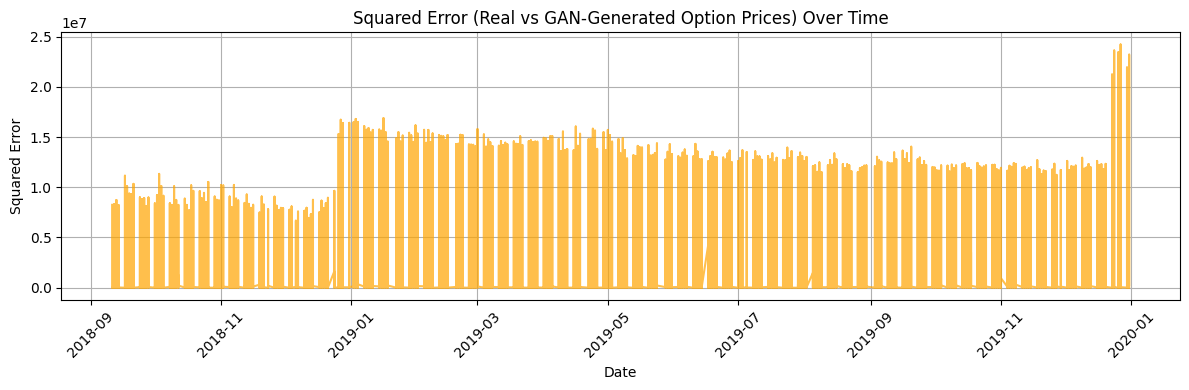

In [88]:
errors = (real_options - fake_options) ** 2

plt.figure(figsize=(12, 4))
plt.plot(test_dates, errors, label="Squared Error", color="orange", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Squared Error")
plt.title("Squared Error (Real vs GAN-Generated Option Prices) Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
test_data

,Date,exdate,cp_flag,Strike Price,best_bid,best_offer,Volatility,Option ID,Time to Expiration,TTM (days),Risk Free Rate,Stock Price,Option Price,Days Since Start
906395,2018-09-11,2020-12-18,C,1000.0,1828.50,1844.40,0.244712,118538798,2.265873,829,2.02,2887.89,2877.604946,252
906396,2018-09-11,2020-12-18,C,1050.0,1782.50,1798.40,0.267173,118538799,2.265873,829,2.02,2887.89,2877.090693,252
906397,2018-09-11,2020-12-18,C,1100.0,1736.40,1752.50,0.272595,118496961,2.265873,829,2.02,2887.89,2876.576440,252
906398,2018-09-11,2020-12-18,C,1200.0,1644.80,1661.00,0.275529,118496962,2.265873,829,2.02,2887.89,2875.547935,252
906399,2018-09-11,2020-06-19,C,1250.0,1604.50,1621.40,0.194354,121009291,1.769841,647,2.02,2887.89,2852.873497,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773065,2019-12-31,2021-03-19,C,4600.0,0.75,1.25,0.127527,131694750,1.214286,444,1.48,3230.78,2468.229508,728
2773066,2019-12-31,2021-06-18,C,4600.0,1.55,2.10,0.124949,131694754,1.464286,535,1.48,3230.78,2704.060196,728
2773067,2019-12-31,2021-12-17,C,4600.0,4.60,5.00,0.123632,131694758,1.960317,717,1.48,3230.78,2977.994389,728
2773068,2019-12-31,2022-12-16,C,4600.0,13.00,21.90,0.126980,131820333,2.948413,1081,1.48,3230.78,3172.213621,728


# Check for 1 ID

Using Option ID: 118538808


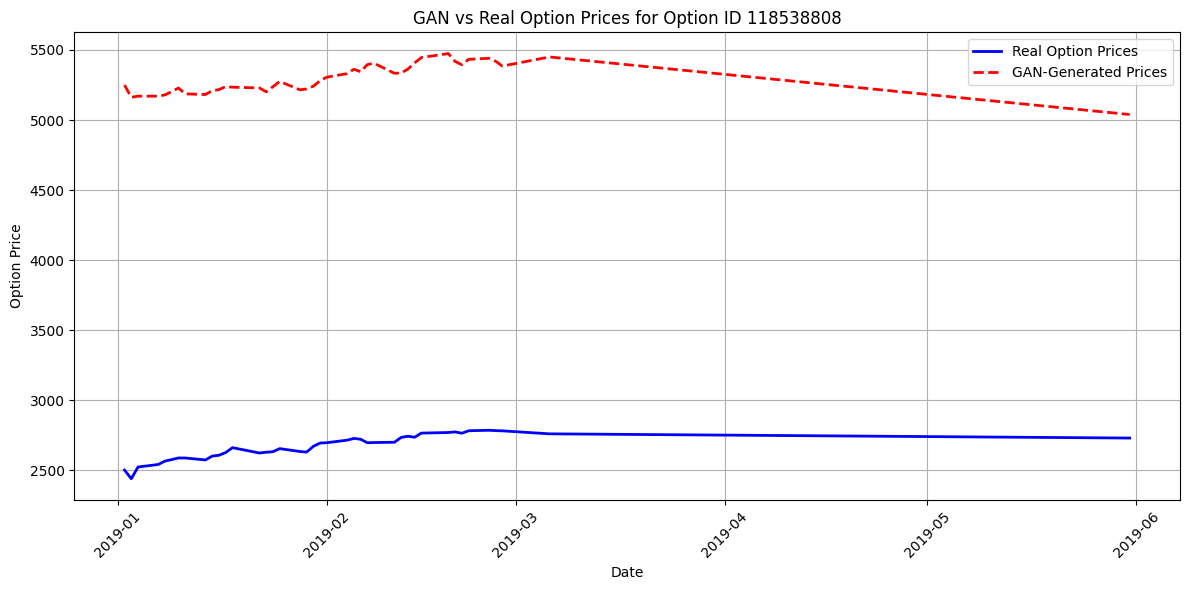

In [93]:
# Pick one Option ID from test_data
sample_option_id = test_data['Option ID'].iloc[0]  # or choose any specific ID
print(f"Using Option ID: {sample_option_id}")

# Filter for only that Option ID
option_subset = test_data[test_data['Option ID'] == sample_option_id].copy()

# Extract real inputs
X_option = option_subset[['Stock Price', 'Strike Price', 'Time to Expiration', 'Volatility', 'Days Since Start']].values
X_option_scaled = scaler.transform(X_option)
X_option_tensor = torch.tensor(X_option_scaled, dtype=torch.float32).to(device)

# Run through the trained generator
generator.eval()
with torch.no_grad():
    generated_prices = generator(X_option_tensor).cpu().numpy().flatten()

# Extract real prices and dates
real_prices = option_subset['Option Price'].values
dates = option_subset['Date'].values

import matplotlib.pyplot as plt

# Sort by date for clean plotting
sorted_idx = np.argsort(dates)
dates = dates[sorted_idx]
real_prices = real_prices[sorted_idx]
generated_prices = generated_prices[sorted_idx]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates, real_prices, label="Real Option Prices", color="blue", linewidth=2)
plt.plot(dates, generated_prices, label="GAN-Generated Prices", color="red", linestyle="--", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Option Price")
plt.title(f"GAN vs Real Option Prices for Option ID {sample_option_id}")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()